In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
davis = pd.read_csv('Davis.csv')

Проверяем перенесенные данные

In [3]:
davis[:10]

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
5,6,M,76,170,76.0,165.0
6,7,M,76,167,77.0,165.0
7,8,M,69,186,73.0,180.0
8,9,M,71,178,71.0,175.0
9,10,M,65,171,64.0,170.0


Меняем обозначение пола M на 1, F на 0

In [4]:
davis.replace(['M', 'F'], [1, 0], inplace=True)

In [5]:
davis[:10]

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,1,77,182,77.0,180.0
1,2,0,58,161,51.0,159.0
2,3,0,53,161,54.0,158.0
3,4,1,68,177,70.0,175.0
4,5,0,59,157,59.0,155.0
5,6,1,76,170,76.0,165.0
6,7,1,76,167,77.0,165.0
7,8,1,69,186,73.0,180.0
8,9,1,71,178,71.0,175.0
9,10,1,65,171,64.0,170.0


Проверяем нет ли в таблицы неизвестных значений, если есть, то удаляем строки их содержащие

In [6]:
davis.isna().any()

Unnamed: 0    False
sex           False
weight        False
height        False
repwt          True
repht          True
dtype: bool

In [7]:
davis=davis.dropna(axis=0, how='any')

In [8]:
davis.isna().any()

Unnamed: 0    False
sex           False
weight        False
height        False
repwt         False
repht         False
dtype: bool

Найдем приблизительную зависимость веса от роста и пола

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linreg = LinearRegression()

In [11]:
X = davis.iloc[:,[1,3]]
Y = davis.iloc[:,[2]]

In [12]:
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(linreg.coef_)
print(linreg.intercept_)

[[22.5818923  -0.34103465]]
[114.10204374]


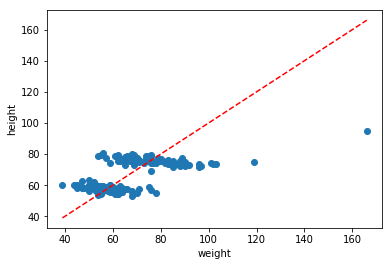

In [14]:
plt.scatter(Y,X.sex*22.5818923-X.height*0.34103465+114)
plt.xlabel('weight')
plt.ylabel('height')
xmin, xmax = davis.weight.min(), davis.weight.max()
plt.plot([xmin,xmax], [xmin,xmax], color='red', linestyle='--')
plt.show()

Оценить вклад роста и пола в вес

In [15]:
h=np.mean(davis.height)
w=np.mean(davis.weight)

In [16]:
print(h*0.34103465/w)
print(22.5818923/w)

0.875192496516957
0.3405818270394134


Построить гистограмму величины (repwt - weight) 

In [17]:
X = davis.iloc[:,[2,4]]
Y = davis.iloc[:,[1]]

In [18]:
X[:10]

,weight,repwt
0,77,77.0
1,58,51.0
2,53,54.0
3,68,70.0
4,59,59.0
5,76,76.0
6,76,77.0
7,69,73.0
8,71,71.0
9,65,64.0


In [19]:
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print(linreg.coef_)
print(linreg.intercept_)

[[-0.00261631  0.02832471]]
[-1.23384409]


In [21]:
delta=Y.sex+1.23384409-2*0.00261631*X.weight

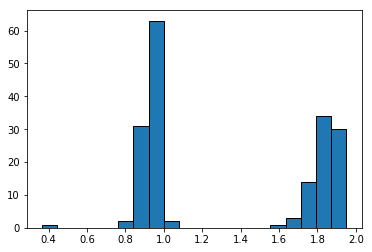

In [22]:
fig = plt.figure()
ax = fig.add_subplot('111')
ax.hist(delta,20,edgecolor='black')
plt.show()